# Description

This will be for the training data only. 

In [13]:
import os
import glob
import subprocess
import pandas as pd

from subprocess import check_output

import pickle
from datetime import datetime
from time import time

import pdb

import datetime
import shutil
import sys
import glob
import os
from subprocess import check_output
import argparse

# Useful functions

In [6]:
def adillyofapickle(basepath,dic, name):
    datefmt = '%m-%d-%Y_%I-%M-%S'
    st = datetime.fromtimestamp(time()).strftime(datefmt)
    if os.path.exists(os.path.join(basepath,'tmp')):
        print('already have tmp')
    else:
        os.makedirs(os.path.join(basepath,'tmp'))
    pickle.dump(dic, open(os.path.join(basepath,'tmp','%s_%s'%(name,st)), 'wb'), protocol=4)


In [7]:
def onetoughjar(path2dic):
    with open(path2dic, 'rb') as pickle_file:
        try:
            while True:
                output = pickle.load(pickle_file)
        except EOFError:
            pass
    return(output)


## Paths

In [4]:
script_path = '/projects/niblab/scripts/BRO/'
fmriprep_path = '/projects/niblab/experiments/bromocriptine/fmriprep'
out_path = '/projects/niblab/data/BRO'
datadir = '/projects/niblab/experiments/bromocriptine/data/preprocessed/'


## Find which subjects have full data

In [4]:
cvs = {}
for dat in glob.glob(os.path.join(script_path,'renci_link','*.csv')):
    typ = dat.split('_')[-1].split('.')[0]
    print(typ)
    cvs[typ] = pd.read_csv(dat,names=['%s'%typ], dtype = 'object')
    

training2
PE1
PE2
anat
training1


In [22]:
df1 = pd.merge(cvs['training1'], cvs['training2'], left_on='training1', right_on='training2')
df2 = pd.merge(df1, cvs['PE1'], left_on='training1', right_on='PE1')
df3 = pd.merge(df2, cvs['PE2'], left_on='training1', right_on='PE2')
df = pd.merge(df3, cvs['anat'], left_on='training1', right_on='anat')

In [23]:
df['training1'].to_csv(os.path.join(out_path,'complete_subs.csv'), index=False, header = False)  

In [99]:
nifts = {'complete':[], 'missing':[]}
for x in glob.glob(os.path.join(datadir, 'sub-*','ses-*','func')):
    nifs = glob.glob(os.path.join(x,'niftis','sub-*_ses-*_task-*_run-*_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz'))
    moco = glob.glob(os.path.join(x,'motion_parameters','sub-*_ses-*_task-*_run-*_moco*.txt'))
    if len(nifs) > 0 and len(moco) > 0: 
        print(x)
        nifts['complete'].append(x)
    else:
        nifts['missing'].append(x)
    
    
    
    
    
    

/projects/niblab/experiments/bromocriptine/data/preprocessed/sub-007/ses-1/func
/projects/niblab/experiments/bromocriptine/data/preprocessed/sub-007/ses-2/func
/projects/niblab/experiments/bromocriptine/data/preprocessed/sub-012/ses-1/func
/projects/niblab/experiments/bromocriptine/data/preprocessed/sub-012/ses-2/func
/projects/niblab/experiments/bromocriptine/data/preprocessed/sub-025/ses-1/func
/projects/niblab/experiments/bromocriptine/data/preprocessed/sub-025/ses-2/func
/projects/niblab/experiments/bromocriptine/data/preprocessed/sub-028/ses-1/func
/projects/niblab/experiments/bromocriptine/data/preprocessed/sub-028/ses-2/func
/projects/niblab/experiments/bromocriptine/data/preprocessed/sub-029/ses-1/func
/projects/niblab/experiments/bromocriptine/data/preprocessed/sub-029/ses-2/func
/projects/niblab/experiments/bromocriptine/data/preprocessed/sub-030/ses-1/func
/projects/niblab/experiments/bromocriptine/data/preprocessed/sub-030/ses-2/func
/projects/niblab/experiments/bromocripti

## Finding missing niftis

In [245]:
def extractor(nifti, output):
    bet_cmd = 'bet %s %s -F'%(nifti, output)
    subprocess.run(['bet','%s'%nifti,'%s'%output,'-F'])

In [258]:
for scan in nifts['missing']:
#     print(scan)
    sub = '%s'%(scan.split('/')[-3])
    ses = '%s'%(scan.split('/')[-2])
    print('starting %s %s'%(sub,ses))
    pos_path = '/projects/niblab/experiments/bromocriptine/data/fmriprep/%s/%s/func/%s_%s_task-training_run-*_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'%(sub,ses,sub,ses)
    for x in glob.glob(pos_path):
        if os.path.exists(x):
            print('here')
            fil = x.split('/')[-1].split('.')[0]
            output = os.path.join(datadir, '%s/%s/func/niftis/%s_brain.nii.gz'%(sub,ses, fil))
            print(output)
            extractor(x, output)

        
        
        
        
        

starting sub-001 ses-1
starting sub-035 ses-2
starting sub-002 ses-1
starting sub-006 ses-1
starting sub-006 ses-2
starting sub-008 ses-2
starting sub-009 ses-1
here
/projects/niblab/experiments/bromocriptine/data/preprocessed/sub-009/ses-1/func/niftis/sub-009_ses-1_task-training_run-2_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz
here
/projects/niblab/experiments/bromocriptine/data/preprocessed/sub-009/ses-1/func/niftis/sub-009_ses-1_task-training_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz
starting sub-009 ses-2
here
/projects/niblab/experiments/bromocriptine/data/preprocessed/sub-009/ses-2/func/niftis/sub-009_ses-2_task-training_run-2_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz
here
/projects/niblab/experiments/bromocriptine/data/preprocessed/sub-009/ses-2/func/niftis/sub-009_ses-2_task-training_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz
starting sub-011 ses-1
here
/projects/niblab/experiments/bromocriptine/data/preproce

In [244]:
nifts['missing']

['/projects/niblab/experiments/bromocriptine/data/preprocessed/sub-001/ses-1/func',
 '/projects/niblab/experiments/bromocriptine/data/preprocessed/sub-035/ses-2/func',
 '/projects/niblab/experiments/bromocriptine/data/preprocessed/sub-002/ses-1/func',
 '/projects/niblab/experiments/bromocriptine/data/preprocessed/sub-006/ses-1/func',
 '/projects/niblab/experiments/bromocriptine/data/preprocessed/sub-006/ses-2/func',
 '/projects/niblab/experiments/bromocriptine/data/preprocessed/sub-008/ses-2/func',
 '/projects/niblab/experiments/bromocriptine/data/preprocessed/sub-009/ses-1/func',
 '/projects/niblab/experiments/bromocriptine/data/preprocessed/sub-009/ses-2/func',
 '/projects/niblab/experiments/bromocriptine/data/preprocessed/sub-011/ses-1/func',
 '/projects/niblab/experiments/bromocriptine/data/preprocessed/sub-011/ses-2/func',
 '/projects/niblab/experiments/bromocriptine/data/preprocessed/sub-013/ses-1/func',
 '/projects/niblab/experiments/bromocriptine/data/preprocessed/sub-013/ses-2

# Confounds 
Many subjects are missing their confounds. Need to make new ones

In [169]:
import numpy as np

In [196]:
fail_fd = {}
for tsv in glob.glob('/projects/niblab/experiments/bromocriptine/data/fmriprep/sub-*/ses-*/func/*.tsv'):
    sub = tsv.split('/')[-4]
    ses = tsv.split('/')[-3]
    task = tsv.split('/')[-1].split('_')[2]
    if task == 'task-resting':
        run = 'run-00'
    else:
        run = tsv.split('/')[-1].split('_')[3]
    df = pd.read_csv(tsv, sep = '\t')
    x = df.columns.str.contains(r'motion_outlier')
    fd = df.iloc[:, x]
    if fd.shape[1] == 0:
        print('no fd')
        d = pd.DataFrame(np.zeros((243, 1)))
        d.write_csv(os.path.join(datadir,sub,ses,'func','confounds','%s_%s_%s_%s_space-MNI152NLin2009cAsym_desc-preproc_confound.txt'%(sub,ses,task,run)),
                         sep = ' ', index = False, header = False)
    else:
        fd2 = fd.sum(axis = 1)
        if fd2.sum(axis = 0) > 61:
            fail_fd[tsv] = fd2.sum(axis = 0)
        else:
            print(sub)
            print(run)
            df = pd.DataFrame(fd2)
            fd2.to_csv(os.path.join(datadir,sub,ses,'func','confounds','%s_%s_%s_%s_space-MNI152NLin2009cAsym_desc-preproc_confound.txt'%(sub,ses,task,run)),
                         sep = ' ', index = False, header = False)
            
            
            
            
            
            
            

sub-037
run-00
sub-037
run-1
sub-037
run-2
sub-020
run-00
sub-020
run-1
sub-035
run-2
sub-035
run-00
sub-001
run-2
sub-001
run-00
sub-001
run-1
sub-002
run-00
sub-002
run-2
sub-002
run-2
sub-002
run-1
sub-002
run-1
sub-027
run-00
sub-027
run-1
sub-027
run-2
sub-045
run-1
sub-045
run-2
sub-045
run-00
sub-045
run-1
sub-045
run-2
sub-045
run-2
sub-045
run-00
sub-045
run-1
sub-053
run-1
sub-053
run-00
sub-053
run-1
sub-053
run-00
sub-010
run-1
sub-010
run-1
sub-010
run-00
sub-010
run-1
sub-010
run-00
sub-010
run-2
sub-010
run-2
sub-010
run-1
sub-014
run-2
sub-014
run-2
sub-014
run-00
sub-014
run-1
sub-052
run-2
sub-052
run-1
sub-052
run-2
sub-052
run-00
sub-052
run-1
sub-052
run-00
sub-052
run-2
sub-052
run-1
sub-052
run-1
sub-052
run-2
sub-051
run-1
sub-051
run-1
sub-051
run-2
sub-051
run-00
sub-051
run-2
sub-051
run-2
sub-051
run-1
sub-051
run-00
sub-051
run-2
sub-051
run-1
sub-050
run-1
sub-050
run-00
sub-050
run-1
sub-050
run-2
sub-050
run-2
sub-050
run-1
sub-050
run-00
sub-050
run-1
s

AttributeError: 'DataFrame' object has no attribute 'write_csv'

# Level 1

## Need these paths
- output
- functional
- confound
- anat
- milkshake_cue_file
- milkshake_delivery_file
- h2O_cue_file
- h2O_delivery_file
- rinse_file
- moco0_file
- moco1_file
- moco2_file
- moco3_file
- moco4_file
- moco5_file


- sub-036_ses-2_task-training_run-1_h2O_cue.txt 
- sub-036_ses-2_task-training_run-1_h2O_delivery.txt 
- sub-036_ses-2_task-training_run-1_milkshake_cue.txt
- sub-036_ses-2_task-training_run-1_milkshake_delivery.txt
- sub-036_ses-2_task-training_run-1_rinse.txt  
#########
- sub-013_ses-2_task-pe_run-1_anticipation_milkshake.txt
- sub-013_ses-2_task-pe_run-1_matched_h2O.txt
- sub-013_ses-2_task-pe_run-1_matched_milkshake.txt
- sub-013_ses-2_task-pe_run-1_pe.txt
- sub-013_ses-2_task-pe_run-1_rinse.txt


In [22]:
subjects = pd.read_csv(os.path.join(script_path, 'complete.csv'), header = None)

In [29]:
onset_path = '/projects/niblab/experiments/bromocriptine/data/onsets/output_onsets'

In [75]:
onset_compl = {}
sess = ['1','2']
runs = ['1','2']
tasks = ['training','pe']
tastes_train = ['h2O_cue','milkshake_cue','h2O_delivery','milkshake_delivery','rinse']
tastes_pe = ['anticipation_milkshake','matched_h2O','matched_milkshake','pe','rinse']

for sub in list(subjects[0]):
    onset_compl[sub] = {}
    for ses in sess:
        onset_compl[sub]['ses-%s'%ses] = {}
        for run in runs:
#             print(run)
            onset_compl[sub]['ses-%s'%ses]['run-%s'%run] = {'training': {'exists': [], 'missing':[]}, 'pe': {'exists': [], 'missing':[]}}
            for task in tasks:
                if task == 'training':
                    for taste in tastes_train:
                        x = os.path.join(onset_path,'%s_ses-%s_task-%s_run-%s_%s.txt'%(sub,ses,task,run,taste))
                        if os.path.exists(x):
                            onset_compl[sub]['ses-%s'%ses]['run-%s'%run]['training']['exists'].append(x)
                        else:
                            y = 'missing %s_ses-%s_task-%s_run-%s_%s.txt'%(sub,ses,task,run,taste)
                            onset_compl[sub]['ses-%s'%ses]['run-%s'%run]['training']['missing'].append(y)
                else:
                    for taste in tastes_pe:
                        x = os.path.join(onset_path,'%s_ses-%s_task-%s_run-%s_%s.txt'%(sub,ses,task,run,taste))
                        if os.path.exists(x):
                            onset_compl[sub]['ses-%s'%ses]['run-%s'%run]['pe']['exists'].append(x)
                        else:
                            y = 'missing %s_ses-%s_task-%s_run-%s_%s.txt'%(sub,ses,task,run,taste)
                            onset_compl[sub]['ses-%s'%ses]['run-%s'%run]['pe']['missing'].append(y)
                        
                        
                        
                        
                        
                        
                        

In [284]:
onset_compl

{'sub-003': {'ses-1': {'run-1': {'training': {'exists': [],
     'missing': ['missing sub-003_ses-1_task-training_run-1_h2O_cue.txt',
      'missing sub-003_ses-1_task-training_run-1_milkshake_cue.txt',
      'missing sub-003_ses-1_task-training_run-1_h2O_delivery.txt',
      'missing sub-003_ses-1_task-training_run-1_milkshake_delivery.txt',
      'missing sub-003_ses-1_task-training_run-1_rinse.txt']},
    'pe': {'exists': [],
     'missing': ['missing sub-003_ses-1_task-pe_run-1_anticipation_milkshake.txt',
      'missing sub-003_ses-1_task-pe_run-1_matched_h2O.txt',
      'missing sub-003_ses-1_task-pe_run-1_matched_milkshake.txt',
      'missing sub-003_ses-1_task-pe_run-1_pe.txt',
      'missing sub-003_ses-1_task-pe_run-1_rinse.txt']}},
   'run-2': {'training': {'exists': [],
     'missing': ['missing sub-003_ses-1_task-training_run-2_h2O_cue.txt',
      'missing sub-003_ses-1_task-training_run-2_milkshake_cue.txt',
      'missing sub-003_ses-1_task-training_run-2_h2O_delivery.t

## Notes
Number of volumns in untrimmed data is 243, the onsets should start at ~8 sec if using untrimmed data

In [260]:
def create_fsf(datadir, sub, ses, task, run):
    inputs = (sub,ses,task,run)
    outdir = '/projects/niblab/scripts/BRO/feat_fsf/level1/fsf_files'
    oot = '/projects/niblab/data/BRO/level1'
    #####################################
    error_file=os.path.join(outdir,'%s_ses-%s_task-%s_run-%s_error_file.txt'%inputs)
    error=open(error_file,'w')
    #####################################
    repl_dict = {}
    subpath = os.path.join(datadir,'%s'%sub,'ses-%s'%ses,'func','niftis')
    #####################################
    funcrun=os.path.join(subpath,'%s_ses-%s_task-%s_run-%s_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz'%inputs)
    repl_dict.update({'FUNCTIONAL':funcrun})
    #####################################
    confounds=os.path.join(datadir,'%s'%sub,'ses-%s'%ses,'func','confounds','%s_ses-%s_task-%s_run-%s_space-MNI152NLin2009cAsym_desc-preproc_confound.txt'%inputs)
    repl_dict.update({'CONFOUND':confounds})
    #####################################
#     anat=os.path.join(datadir,'%s'%sub,'anat','highres.nii.gz')
#     repl_dict.update({'ANAT':anat})
    #####################################
    ntmpts=check_output(['fslnvols',funcrun], universal_newlines=True)
    repl_dict.update({'VOL':ntmpts.strip()})
    #####################################
    output=os.path.join(oot,'%s_ses-%s_%s_run-%s.feat'%inputs)
    repl_dict.update({'OUTPUT':output})
    #####################################
    onsets=['h2O_cue', 'h2O_delivery', 'milkshake_cue', 'milkshake_delivery', 'rinse']
    repl = ['H2O_CUE','H2O_DELIVERY','MILKSHAKE_CUE','MILKSHAKE_DELIVERY','RINSE']
    for i,onset in enumerate(onsets):
#         print(onset)
        new_inputs = inputs+(onset,)
        value=os.path.join('/projects/niblab/experiments/bromocriptine/data/onsets/output_onsets/%s_ses-%s_task-%s_run-%s_%s.txt'%(new_inputs))
        repl_dict[repl[i]]=value
    #####################################
    mocos = ['moco0_file','moco1_file','moco2_file','moco3_file','moco4_file','moco5_file']
    for moco in mocos:
#         print(moco)
        m1 = moco.split('_')[0]
        new2_inputs = inputs+(m1,)
        v1=os.path.join('/projects/niblab/experiments/bromocriptine/data/preprocessed/%s/ses-%s/func/motion_parameters/'%(sub,ses))
        value = os.path.join(v1,'%s_ses-%s_task-%s_run-%s_%s.txt'%new2_inputs)
        repl_dict[moco]=value
    #####################################
    for key, value in repl_dict.items():
        if key in onsets:
            if os.path.exists(value)== False:
                error.write('%s is missing %s %s \n'%(sub,key,value))
#         if key == 'OUTPUT':
#             if os.path.exists(value)==True:
#                 time_inputs = inputs+(datestamp,)
#                 if os.path.exists(os.path.join(oot,'old'))== True:
#                     shutil.move(value,os.path.join(oot,'old','%s_ses-%s_%s_run-%s_%s.feat')%(time_inputs))
#                 else:
#                     os.makedirs(os.path.join(oot,'old'))
#                     shutil.move(value,os.path.join(oot,'old','%s_ses-%s_%s_run-%s_%s.feat')%(time_inputs))
    #####################################
    subfile=os.path.join(outdir,'%s_ses-%s_task-%s_run-%s.fsf'%inputs)
    with open(os.path.join('/projects/niblab/scripts/BRO/feat_fsf/level1/templates','%s_design1_ges.fsf'%(task)),'r') as infile:
        tempfsf=infile.read()
        for key in repl_dict:
            tempfsf = tempfsf.replace(key, repl_dict[key])
            with open(subfile,'w') as outfile:
                outfile.write(tempfsf)
    name = '%s_ses-%s_%s_run-%s'%inputs
    adillyofapickle(outdir,repl_dict, name)
    error.close()

    

In [261]:
for x in nifts['complete']:
    sub = x.split('/')[-3]
    ses = x.split('/')[-2]
    try:
        for run, df in onset_compl[sub][ses].items():
            for task, stuff in df.items():
                    if task == 'training':
                        test = '/projects/niblab/experiments/bromocriptine/data/fmriprep/%s/%s/func/%s_%s_task-%s_%s_desc-confounds_regressors.tsv'%(sub, ses, sub,ses, task, run)
                        if test in list(fail_fd.keys()):
                            print('no fd')
                        else:
                            if len(df['training']['exists']) == 5:
                                print(sub)
                                print(ses)
                                print(run)
                                print(task)
                                create_fsf(datadir, '%s'%sub, '%s'%(ses.split('-')[1]), '%s'%task, '%s'%(run.split('-')[1]))
    except KeyError:
        continue

                            

sub-025
ses-1
run-1
training
already have tmp
sub-025
ses-1
run-2
training
already have tmp
sub-025
ses-2
run-1
training
already have tmp
sub-025
ses-2
run-2
training
already have tmp
sub-028
ses-1
run-1
training
already have tmp
sub-028
ses-1
run-2
training
already have tmp
sub-028
ses-2
run-1
training
already have tmp
sub-028
ses-2
run-2
training
already have tmp
sub-029
ses-1
run-1
training
already have tmp
sub-029
ses-1
run-2
training
already have tmp
sub-029
ses-2
run-1
training
already have tmp
sub-029
ses-2
run-2
training
already have tmp
sub-030
ses-1
run-1
training
already have tmp
sub-030
ses-1
run-2
training
already have tmp
sub-030
ses-2
run-1
training
already have tmp
sub-030
ses-2
run-2
training
already have tmp
sub-032
ses-1
run-1
training
already have tmp
sub-032
ses-1
run-2
training
already have tmp
sub-032
ses-2
run-1
training
already have tmp
sub-032
ses-2
run-2
training
already have tmp
no fd
no fd
sub-033
ses-2
run-1
training
already have tmp
sub-033
ses-2
run-2
tr

In [262]:
done = glob.glob(os.path.join('/projects/niblab/data/BRO/level1/sub-*'))

In [266]:
don2 = []
for x in done:
    don2.append(x.split('/')[-1].split('.')[0])
    
    

In [282]:
todo =[]
for y in glob.glob(os.path.join('/projects/niblab/scripts/BRO/feat_fsf/level1/fsf_files','sub-*_ses-*_task-training_run-*.fsf')):
    t = y.split('/')[-1].split('.')[0]
    x = '%s_%s_training_%s'%(t.split('_')[0],t.split('_')[1],t.split('_')[3])
#     print(x)
#     print(t)
    if x in don2:
        print('done')
    else:
        print('to do!')
        todo.append(y)
    







done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
to do!
to do!
done
done
done
done
done
done
done
done
done
done
done
done


In [283]:
todo

['/projects/niblab/scripts/BRO/feat_fsf/level1/fsf_files/sub-004_ses-2_task-training_run-1.fsf',
 '/projects/niblab/scripts/BRO/feat_fsf/level1/fsf_files/sub-004_ses-2_task-training_run-2.fsf']

In [267]:
don2

['sub-029_ses-1_training_run-1',
 'sub-053_ses-1_training_run-1',
 'sub-043_ses-1_training_run-1',
 'sub-026_ses-1_training_run-1',
 'sub-044_ses-1_training_run-1',
 'sub-025_ses-1_training_run-1',
 'sub-047_ses-1_training_run-1',
 'sub-028_ses-1_training_run-1',
 'sub-022_ses-1_training_run-1',
 'sub-032_ses-1_training_run-1',
 'sub-039_ses-1_training_run-1',
 'sub-041_ses-1_training_run-1',
 'sub-036_ses-1_training_run-1',
 'sub-030_ses-1_training_run-1',
 'sub-040_ses-1_training_run-1',
 'sub-022_ses-1_training_run-2',
 'sub-025_ses-1_training_run-2',
 'sub-026_ses-1_training_run-2',
 'sub-028_ses-1_training_run-2',
 'sub-029_ses-1_training_run-2',
 'sub-030_ses-1_training_run-2',
 'sub-032_ses-1_training_run-2',
 'sub-041_ses-1_training_run-2',
 'sub-039_ses-1_training_run-2',
 'sub-040_ses-1_training_run-2',
 'sub-043_ses-1_training_run-2',
 'sub-036_ses-1_training_run-2',
 'sub-044_ses-1_training_run-2',
 'sub-040_ses-2_training_run-2',
 'sub-033_ses-2_training_run-2',
 'sub-043_

In [240]:
x = glob.glob(os.path.join('/projects/niblab/scripts/BRO/feat_fsf/level1/fsf_files', 'sub-*_ses-2_task-training_run-1.fsf'))
z = []
for y in x:
    print(y.split('/')[-1].split('_')[0].split('-')[1])





025
028
029
030
032
033
036
038
039
040
041
044
046
004
022
026
043


## Check level 1

## Registration
https://mumfordbrainstats.tumblr.com/post/166054797696/feat-registration-workaround

# Visualization

In [227]:
import nibabel as nib

In [235]:
epi = os.path.join('/projects/niblab/data/BRO/level1/sub-022_ses-1_training_run-1.feat','example_func.nii.gz')
epi_img = nib.load(epi)

In [230]:
f = os.path.join(datadir,'sub-003','anat','highres.nii.gz')
img = nib.load(f)

In [229]:
g = '/projects/niblab/experiments/bromocriptine/data/bids/bids/sub-001/ses-2/anat/sub-001_ses-2_T1w.nii.gz'
img2 = nib.load(g)

In [231]:
import matplotlib

In [232]:
from nilearn.plotting import view_img_on_surf, view_img
from nilearn import plotting


In [237]:
bak_g = '/projects/niblab/modules/software/fsl/5.0.10/data/standard/tpl-MNI152NLin2009cAsym_res-01_T1w_brain.nii.gz'


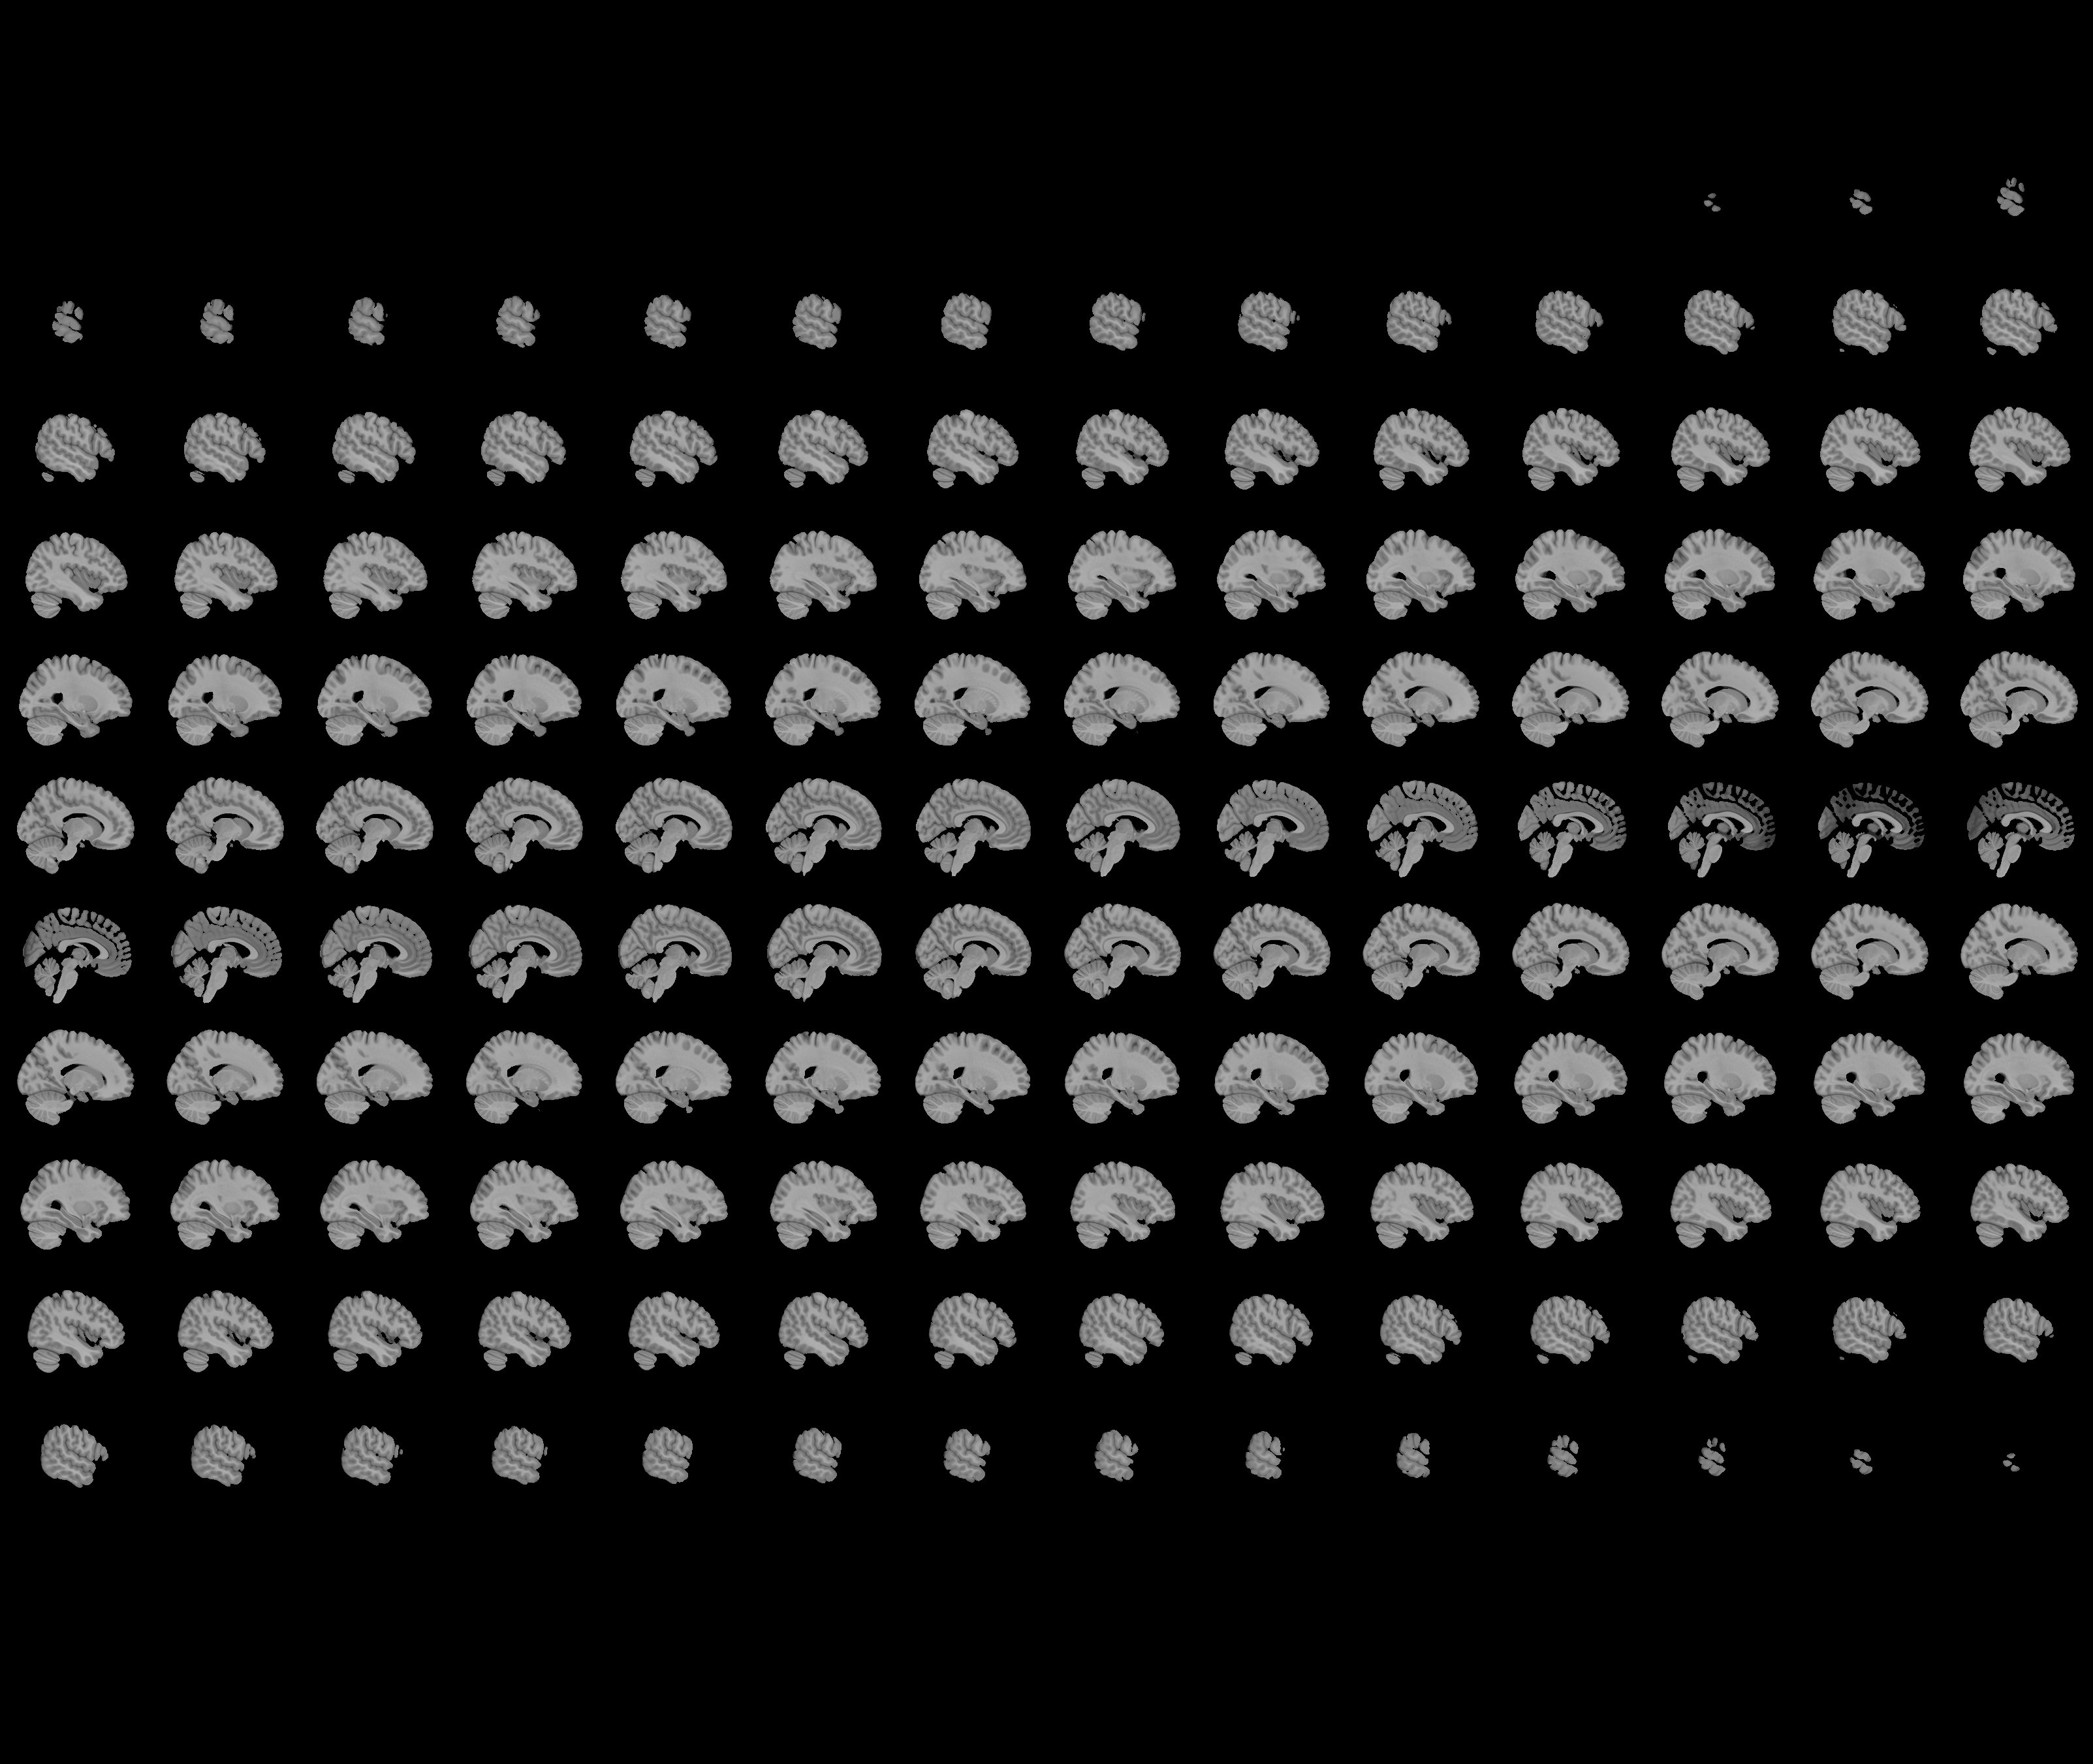
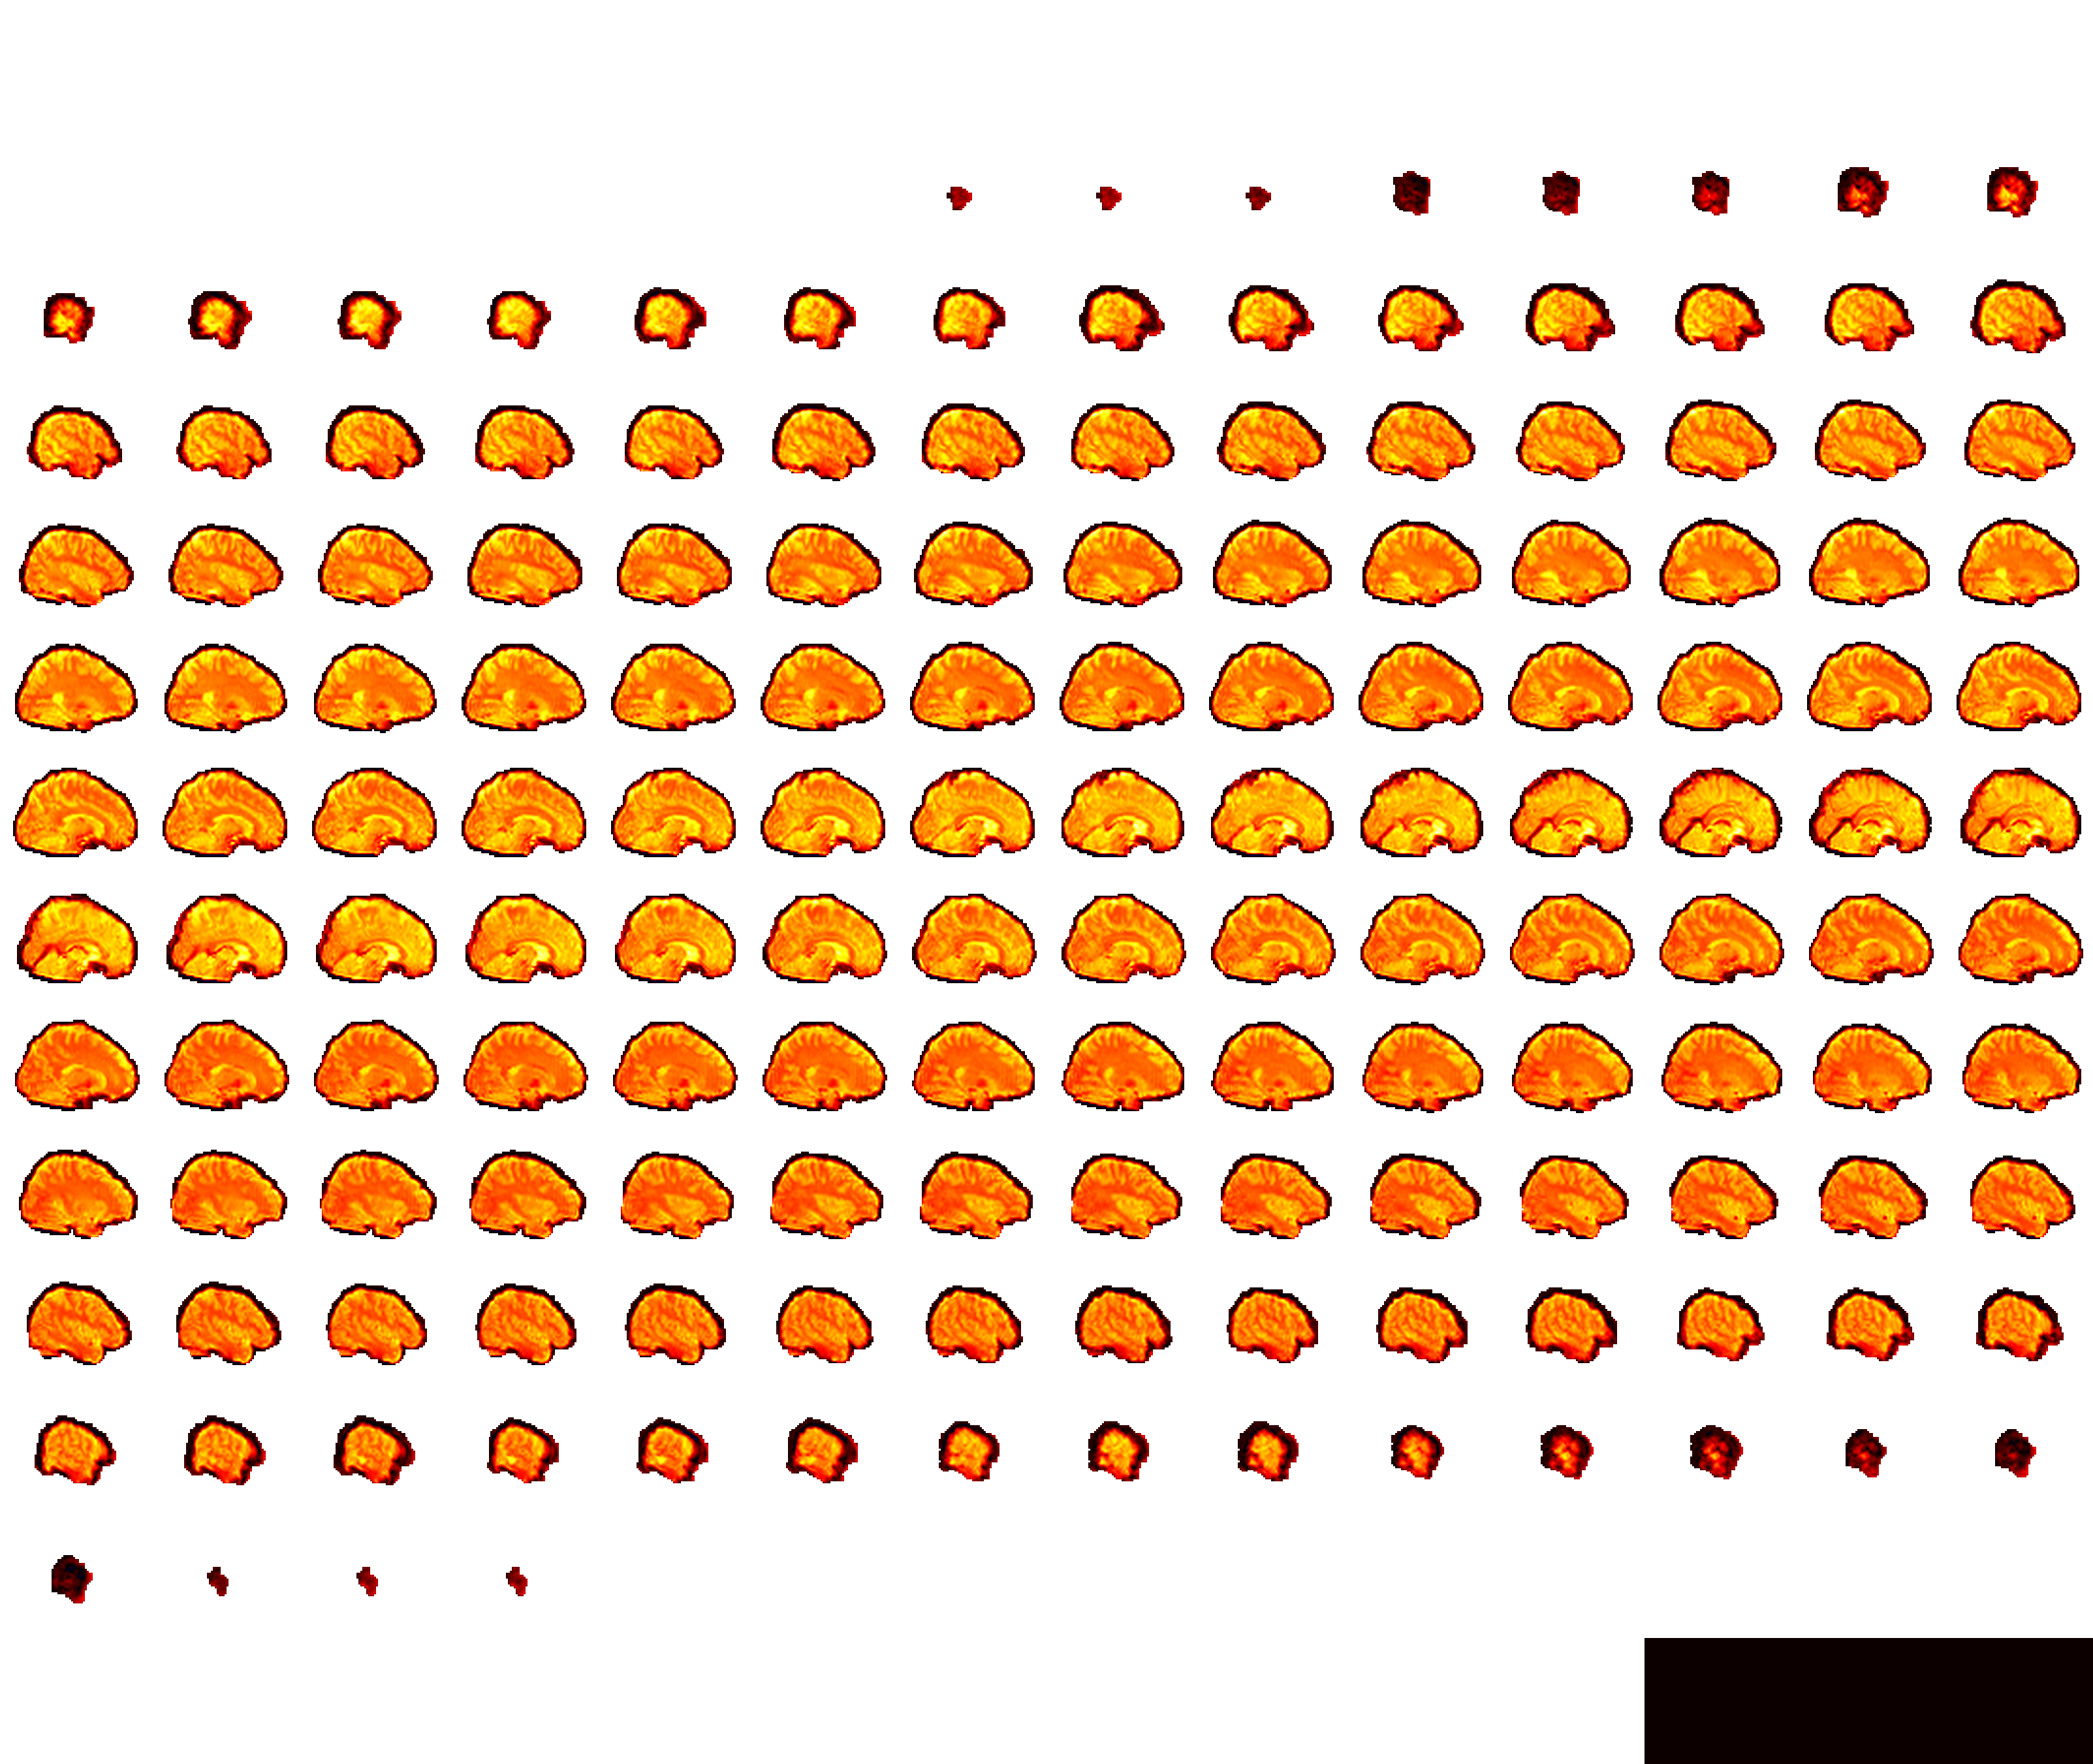

In [238]:
plotting.view_img(epi_img, bg_img = bak_g)
# plotting.plot_epi(epi_img)

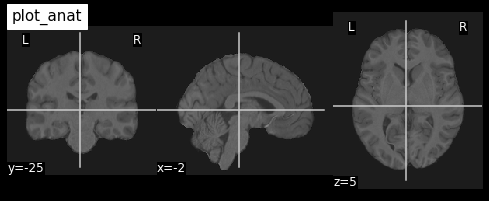

In [128]:
plotting.plot_anat(img, title="plot_anat")

/home/gshearre/miniconda3/lib/python3.7/site-packages/nilearn/image/resampling.py:531: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


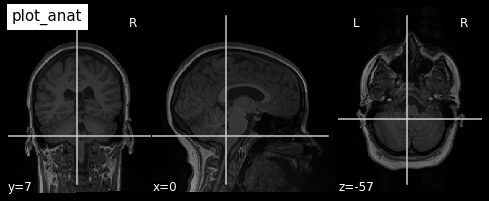

In [129]:
plotting.plot_anat(img2, title="plot_anat")

# Notes
~Need to look back into the skipping the registration in FSL (Jeannette)~


- 5/24 Submitted first batch of level 1, ses-1
- Next need to find the missing onsets and finish the level1s then check them
